In [1]:
from funcoes_arima import read_data
from funcoes_arima import arima_model_plot
from funcoes_arima import sarima_model_plot
from funcoes_arima import autoArima
from funcoes_arima import plot_diffs
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

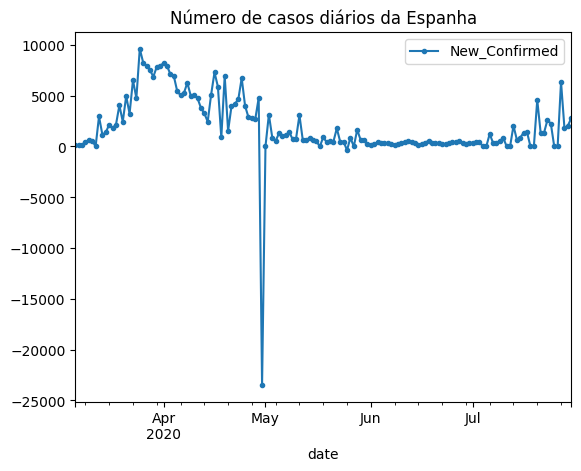

In [2]:
reg_data_es = read_data('ES')
reg_data_es = reg_data_es.loc[reg_data_es.ge(100).idxmax()[0]:]
reg_data_es.plot(marker='.')
plt.title('Número de casos diários da Espanha');

In [3]:
negatives = reg_data_es.query('New_Confirmed < 0').index
reg_data_es.loc[negatives] = 0

<AxesSubplot:xlabel='date'>

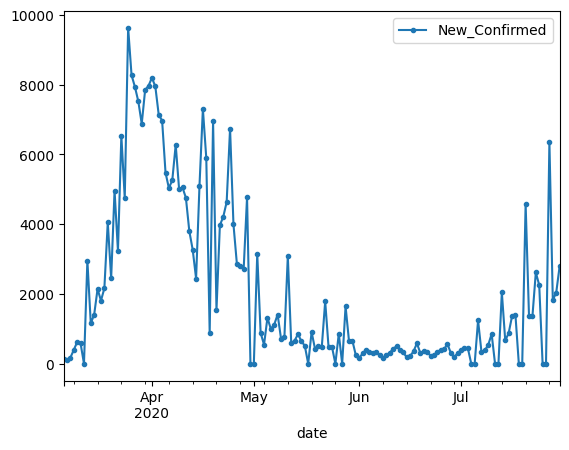

In [4]:
reg_data_es.plot(marker='.')

In [5]:
print('Total de registros:', len(reg_data_es))
print('Número de registros para treino:', round(len(reg_data_es)*0.7, 0))
print('Número de registros para teste:', round(len(reg_data_es)*0.3, 0))

Total de registros: 147
Número de registros para treino: 103.0
Número de registros para teste: 44.0


In [6]:
train_data = reg_data_es.iloc[:103]
test_data = reg_data_es.iloc[103:]
print('Número de registros para treino final:', len(train_data))
print('Número de registros para teste final:', len(test_data))

Número de registros para treino final: 103
Número de registros para teste final: 44


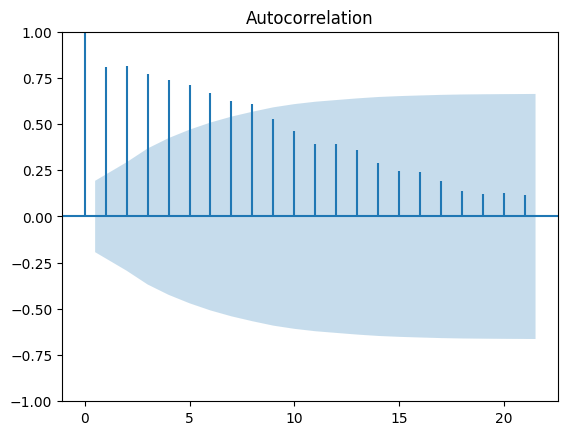

In [7]:
plot_acf(train_data['New_Confirmed'],  marker='');

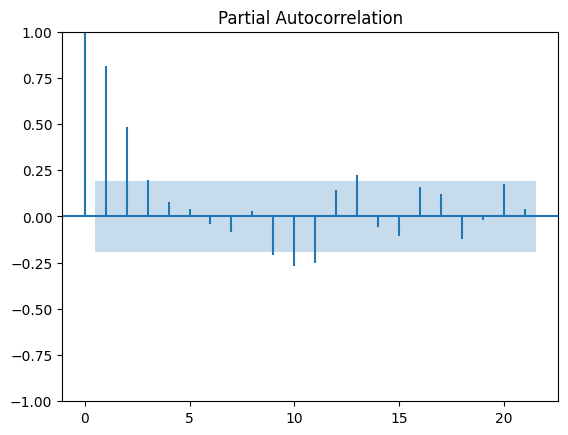

In [8]:
plot_pacf(train_data['New_Confirmed'],  marker='');

ADF Statistic 0 Order: -1.349132
p-value: 0.606406
ADF Statistic 1st Order: -10.827343
p-value: 0.000000
ADF Statistic 2nd Order: -3.599232
p-value: 0.005776
ADF Statistic 3th order: -9.863328
p-value: 0.000000


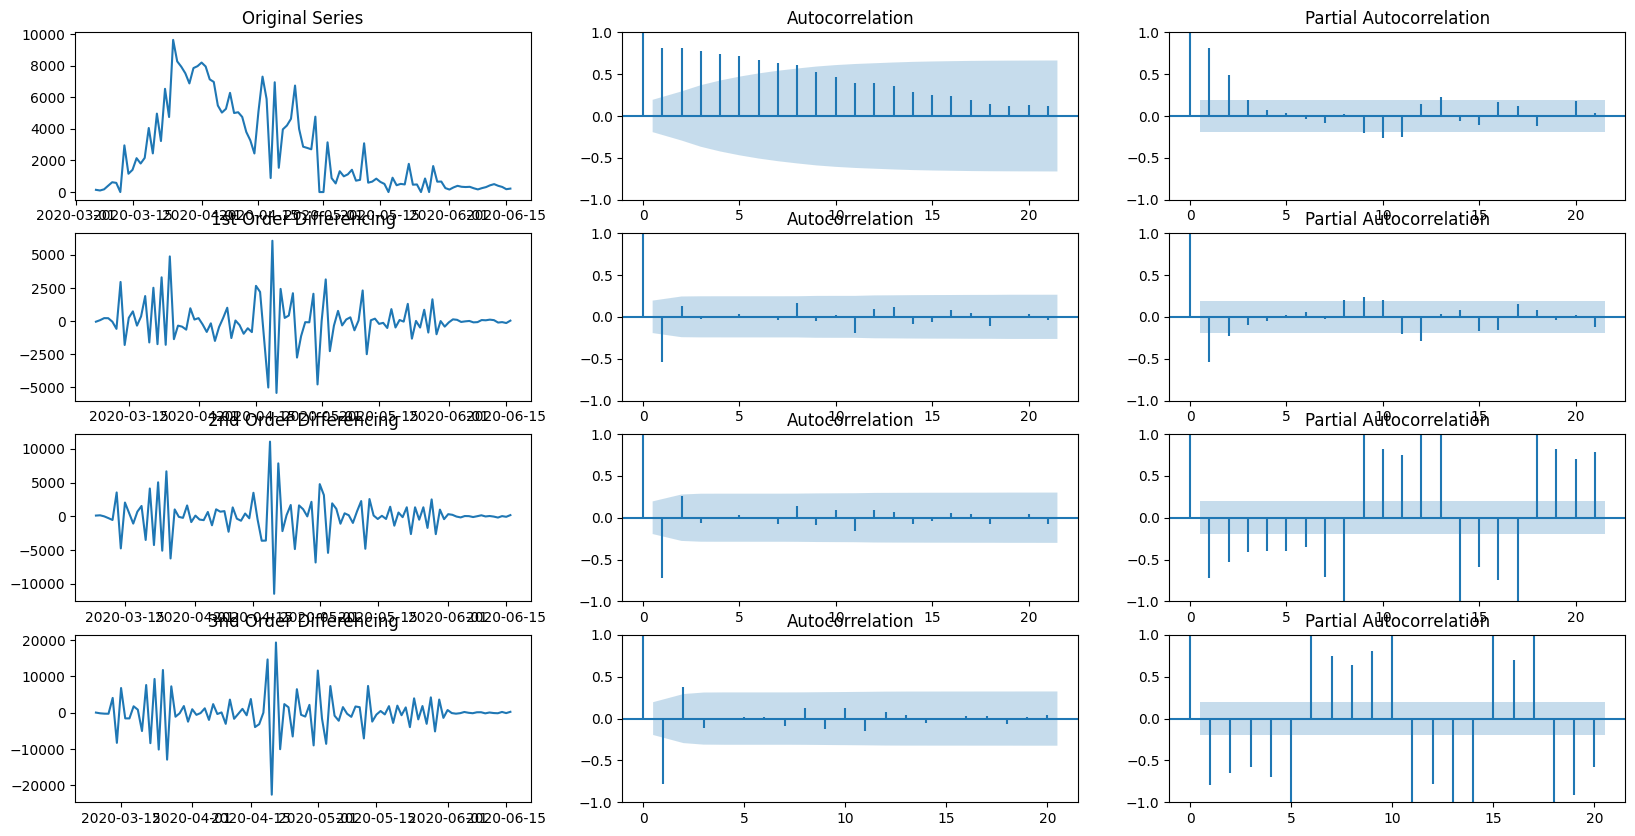

In [9]:
plot_diffs(train_data)

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                  103
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -889.240
Date:                Wed, 18 Jan 2023   AIC                           1786.481
Time:                        21:52:44   BIC                           1797.020
Sample:                    03-06-2020   HQIC                          1790.749
                         - 06-16-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2601.0193   1497.951      1.736      0.082    -334.910    5536.949
ar.L1          0.4223      0.068      6.188      0.000       0.289       0.556
ar.L2          0.4812      0.064      7.551      0.0

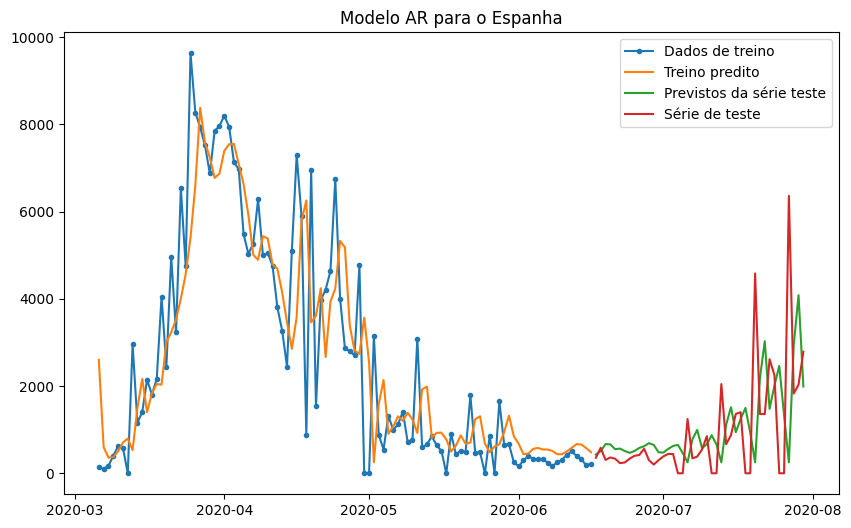

In [10]:
arima_model_plot(train_data, test_data, p=2, model_name='AR', country='Espanha')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                  103
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -887.698
Date:                Wed, 18 Jan 2023   AIC                           1795.396
Time:                        21:52:45   BIC                           1821.743
Sample:                    03-06-2020   HQIC                          1806.068
                         - 06-16-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2595.0052    617.895      4.200      0.000    1383.952    3806.058
ma.L1          0.2476      0.178      1.391      0.164      -0.101       0.596
ma.L2          0.4651      0.334      1.391      0.1

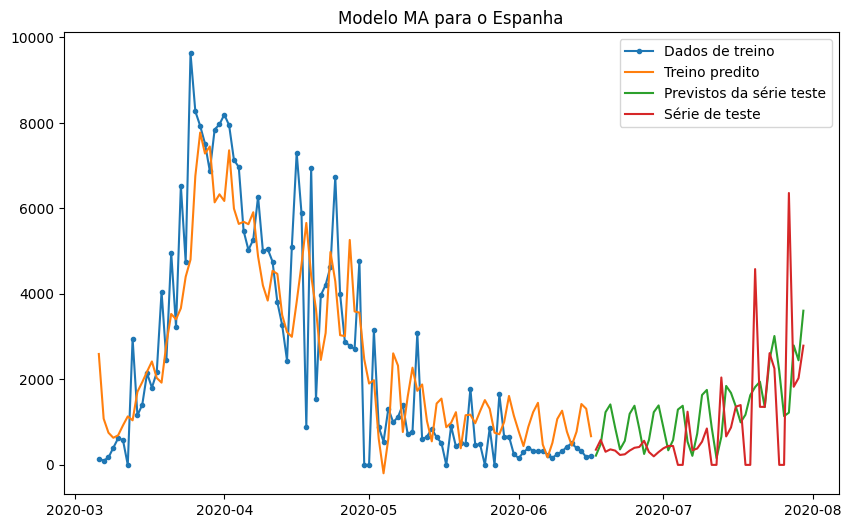

In [11]:
arima_model_plot(train_data, test_data, q=8, model_name='MA', country='Espanha')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                  103
Model:                 ARIMA(2, 1, 8)   Log Likelihood                -868.145
Date:                Wed, 18 Jan 2023   AIC                           1758.290
Time:                        21:52:48   BIC                           1787.165
Sample:                    03-06-2020   HQIC                          1769.983
                         - 06-16-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0915      0.130      0.702      0.483      -0.164       0.347
ar.L2         -0.8588      0.124     -6.904      0.000      -1.103      -0.615
ma.L1         -0.8413      0.165     -5.102      0.0

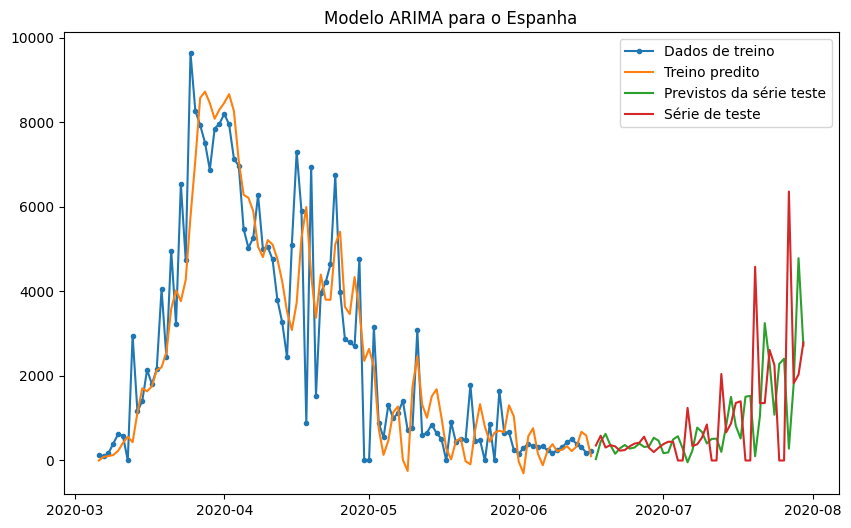

In [12]:
arima_model_plot(train_data, test_data, p=2, d=1, q=8, model_name='ARIMA', country='Espanha')

In [13]:
autoArima(train_data)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(5, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

                                    SARIMAX Results                                     
Dep. Variable:                    New_Confirmed   No. Observations:                  103
Model:             ARIMA(1, 1, 2)x(5, 1, [], 7)   Log Likelihood                -824.893
Date:                          Wed, 18 Jan 2023   AIC                           1667.787
Time:                                  21:56:56   BIC                           1690.772
Sample:                              03-06-2020   HQIC                          1677.074
                                   - 06-16-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7163      0.205      3.486      0.000       0.314       1.119
ma.L1         -1.4589      0.190     -7.687      0.

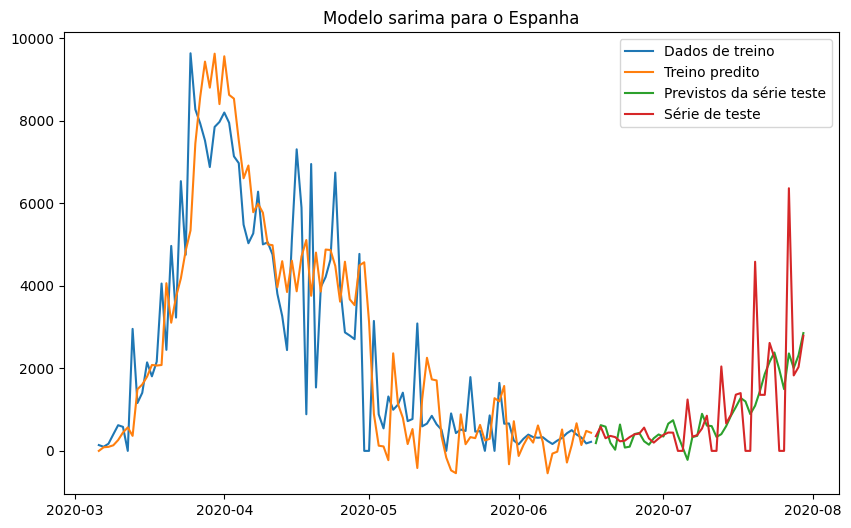

In [15]:
sarima_model_plot(train_data, test_data, p=1, d=1, q=2, P=5, D=1, Q=0, m=7, country='Espanha', model_name='sarima')